In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


Epoch 1/20
6666/6666 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - loss: 0.3884 - val_loss: 0.1556
Epoch 2/20
6666/6666 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - loss: 0.1535 - val_loss: 0.1488
Epoch 3/20
6666/6666 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - loss: 0.1494 - val_loss: 0.1466
Epoch 4/20
6666/6666 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - loss: 0.1486 - val_loss: 0.1472
Epoch 5/20
6666/6666 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - loss: 0.1486 - val_loss: 0.1457
Epoch 6/20
6666/6666 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - loss: 0.1488 - val_loss: 0.1462
Epoch 7/20
6666/6666 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - loss: 0.1476 - val_loss: 0.1455
Epoch 8/20
6666/6666 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - loss: 0.1476 - val_loss: 0.1453
Epoch 9/20
6666/6666 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - loss: 0.1472 - val_loss: 0.1456
Epoch 10/20
6666/6666 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - loss: 0.1469 - val_loss: 0.1434
Epoch 11/20
6666/6666 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - loss: 0.1457 - val_loss: 0.1337
Epoch 12/20
6666/66

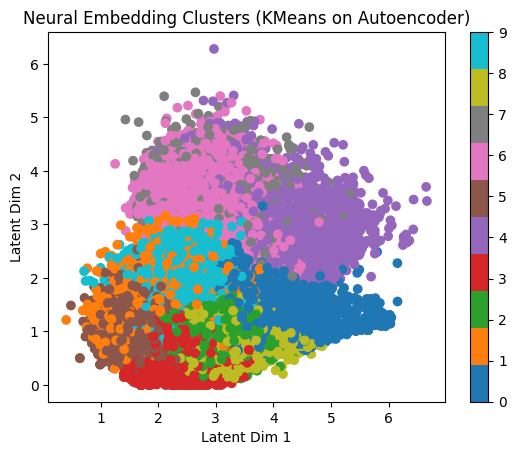

In [3]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load and preprocess data
data = pd.read_csv('../data/preprocess.csv')
features = [
    'variance', 'Tempo', 'Loudness', 'Explicit', 'Popularity', 'Energy',
    'Danceability', 'Positiveness', 'Speechiness', 'Liveness',
    'Acousticness', 'Instrumentalness'
]

scaler = StandardScaler()
X = scaler.fit_transform(data[features])

# Build Autoencoder
input_dim = X.shape[1]
encoding_dim = 6  # Latent dimension

input_layer = tf.keras.layers.Input(shape=(input_dim,))
encoded = tf.keras.layers.Dense(12, activation='relu')(input_layer)
encoded = tf.keras.layers.Dense(encoding_dim, activation='relu')(encoded)

decoded = tf.keras.layers.Dense(12, activation='relu')(encoded)
decoded = tf.keras.layers.Dense(input_dim, activation='linear')(decoded)

autoencoder = tf.keras.models.Model(inputs=input_layer, outputs=decoded)
encoder = tf.keras.models.Model(inputs=input_layer, outputs=encoded)

autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.fit(X, X, epochs=20, batch_size=32, shuffle=True, validation_split=0.1)

# Encode and Cluster
X_encoded = encoder.predict(X)
kmeans = KMeans(n_clusters=10, random_state=42)
clusters = kmeans.fit_predict(X_encoded)

# Add to data and plot
data['Cluster'] = clusters
plt.scatter(X_encoded[:, 0], X_encoded[:, 1], c=clusters, cmap='tab10')
plt.title("Neural Embedding Clusters (KMeans on Autoencoder)")
plt.xlabel("Latent Dim 1")
plt.ylabel("Latent Dim 2")
plt.colorbar()
plt.show()


In [4]:
from sklearn.metrics import mean_squared_error

# Reconstruct the input
X_reconstructed = autoencoder.predict(X)

# Evaluate reconstruction error
mse = mean_squared_error(X, X_reconstructed)
print(f'Reconstruction MSE: {mse:.4f}')


7406/7406 ━━━━━━━━━━━━━━━━━━━━ 4s 550us/step
Reconstruction MSE: 0.1217


In [6]:
# autoencoder.save('saved_model/song_autoencoder')

autoencoder.save('song_autoencoder_model.h5')


In [7]:
song_idx = 42  # example
song_cluster = data.loc[song_idx, 'Cluster']

# Find similar songs
similar_songs = data[data['Cluster'] == song_cluster]
print(similar_songs[['artist', 'Genre', 'emotion', 'Popularity']].head(10))


    artist  Genre  emotion  Popularity
0      523   2033        4          31
1      523   2033        5          59
2      523   2033        7          50
3      523   2033        4          52
4      523   2033        4          52
5      523   2033        1          34
7      523   2033        7          74
9      523   2033        1          56
13     523   2033        4          71
14     523   2033        4          30
